In [116]:
from PIL import Image
import numpy as np

In [2]:
#img = Image.open('FASSEG/V2/Train_RGB/1.bmp')

In [3]:
import os
import sys
import glob
import shutil

In [4]:
def find_corresponding_images(masks_dir, input_images_dir, input_ext='.bmp'):
    if not os.path.exists(masks_dir) or not os.path.isdir(masks_dir):
        raise ValueError('The path for the masks directory %s does not exist or is not a folder' % masks_dir)
    if not os.path.exists(input_images_dir) or not os.path.isdir(input_images_dir):
        raise ValueError('The path for the input images directory %s does not exist or is not a folder' % input_images_dir)

    # find the segmentation masks (bmp) images in the masks directory
    mask_files = glob.glob(os.path.join(masks_dir, "*.bmp"))
    print('Found %d segmentation masks ' % len(mask_files))

    num_images = len(mask_files)

    image_tuples = []
    for idx, mask_path in enumerate(mask_files):
        basename = os.path.basename(mask_path)
        sys.stdout.write('\r>> Searching image for  segmentation mask %s (%d/%d) ' % (basename, idx+1, num_images))
        sys.stdout.flush()
        img_path = os.path.join(input_images_dir, basename.replace('.bmp', input_ext))
        if os.path.exists(img_path):
            image_tuples.append((img_path, mask_path))
        else:
            sys.stdout.write('\r>> Error! Could not find input image for segmentation %s' % basename)
            sys.stdout.flush()

    return image_tuples

In [5]:
image_tuples = sorted(find_corresponding_images('FASSEG/V2/train/Train_RGB', 'FASSEG/V2/train/Train_Labels'))
#image_tuples = find_corresponding_images('FASSEG/V2/Train_RGB', 'FASSEG/V2/Train_Labels')

Found 20 segmentation masks 
>> Searching image for  segmentation mask 17.bmp (20/20) 

In [6]:
print(image_tuples)

[('FASSEG/V2/train/Train_Labels/1.bmp', 'FASSEG/V2/train/Train_RGB/1.bmp'), ('FASSEG/V2/train/Train_Labels/10.bmp', 'FASSEG/V2/train/Train_RGB/10.bmp'), ('FASSEG/V2/train/Train_Labels/11.bmp', 'FASSEG/V2/train/Train_RGB/11.bmp'), ('FASSEG/V2/train/Train_Labels/12.bmp', 'FASSEG/V2/train/Train_RGB/12.bmp'), ('FASSEG/V2/train/Train_Labels/13.bmp', 'FASSEG/V2/train/Train_RGB/13.bmp'), ('FASSEG/V2/train/Train_Labels/14.bmp', 'FASSEG/V2/train/Train_RGB/14.bmp'), ('FASSEG/V2/train/Train_Labels/15.bmp', 'FASSEG/V2/train/Train_RGB/15.bmp'), ('FASSEG/V2/train/Train_Labels/16.bmp', 'FASSEG/V2/train/Train_RGB/16.bmp'), ('FASSEG/V2/train/Train_Labels/17.bmp', 'FASSEG/V2/train/Train_RGB/17.bmp'), ('FASSEG/V2/train/Train_Labels/18.bmp', 'FASSEG/V2/train/Train_RGB/18.bmp'), ('FASSEG/V2/train/Train_Labels/19.bmp', 'FASSEG/V2/train/Train_RGB/19.bmp'), ('FASSEG/V2/train/Train_Labels/2.bmp', 'FASSEG/V2/train/Train_RGB/2.bmp'), ('FASSEG/V2/train/Train_Labels/20.bmp', 'FASSEG/V2/train/Train_RGB/20.bmp'), ('

In [139]:
data = []
label = []

new_width = 256
new_height = 256

for i in range(len(image_tuples)):
    x = Image.open(image_tuples[i][1])
    y = Image.open(image_tuples[i][0])
    
    width, height = x.size   

    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2

    x = x.crop((left, top, right, bottom))

    width, height = y.size   

    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2

    y = y.crop((left, top, right, bottom))
    
    data.append(np.array(x))
    label.append(np.array(y))

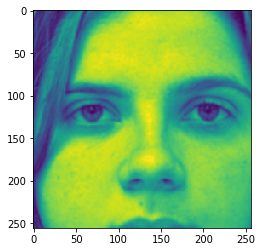

In [141]:
plt.imshow(Image.fromarray(data[2].astype('uint8')))

In [105]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [99]:
# create generator
datagen = ImageDataGenerator()
# prepare an iterators for each dataset
train_it = datagen.flow_from_directory('FASSEG/V2/train', class_mode = 'input',  batch_size = 20)
# confirm the iterator works

Found 40 images belonging to 2 classes.


In [101]:
batchX, batchy = train_it.next()

In [102]:
print(batchX.shape, batchy.shape)

(20, 256, 256, 3) (20, 256, 256, 3)


In [103]:
img = Image.fromarray(batchX[0].astype('uint8'),'RGB')
img2 = Image.fromarray(batchy[0].astype('uint8'),'RGB')

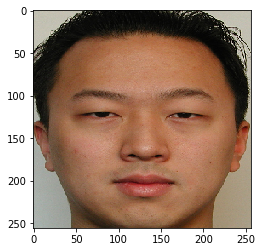

In [107]:
plt.imshow(img)

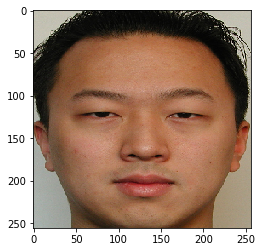

In [108]:
plt.imshow(img2)